* **1. Imported Needed Libraries**

In [2]:
!pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=5e3726fee595c225df2c4be1c0e640f3d1e0e096f62b3461d54706afeb1a8260
  Stored in directory: c:\users\alhou\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os 
import numpy as np 
import matplotlib.pyplot as plt 

* **Initialize The initial Learning rate**
* **Number of epoch size for training**
* **number of batch size**

In [2]:
intial_learning_rate = 1e-4 # --> = 0.0001
number_epochs = 20
batch_size = 32
Directory = r"D:\AI\AI Models\Data\Face-Mask-Detection-master\dataset"
Categories = ['with_mask','without_mask']
print("[INFO] Loading Images......")
data =  []
labels= []
for category in Categories:
    path = os.path.join(Directory,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img) # Enter and take all images in with_mask,without_mask
        image = load_img(img_path,target_size=(224,224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)

[INFO] Loading Images......


c:\Users\Alhou\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


* **Perform One-hot encoding on the labels**

In [3]:
lb =LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels) #Because convert from vector to matrix
data = np.array(data,dtype='float32')
labels = np.array(labels)
(train_x ,test_x,train_y,test_y) = train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=42)
#random_state=42 sets the seed value for the random number generator to 42, ensuring reproducibility.

* **Make Data Agumentation by using ImageDataGenerator**

In [4]:
aug = ImageDataGenerator(rotation_range=20,
                         zoom_range=0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.15,
                         horizontal_flip=True,
                         fill_mode='nearest')

* **Load MobileNetv2**

In [5]:
baseModel = MobileNetV2(weights='imagenet',include_top=False,
                        input_tensor =Input(shape=(224,224,3)))
#Connstruct The head of the model that will be placed on a top of the base model
headModel = baseModel.output#Create an output layer
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name='Flatten_Layer')(headModel)
headModel = Dense(units = 128 , activation ='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(units = 2 ,name ='Output_Layer',activation ='softmax')(headModel)
#Place the head FC model On top of the base model
# (this will become the actual model will will train)
model = Model(inputs = baseModel.input , outputs = headModel)



9406464/9406464 [==============================] - 5s 1us/step


* **Loop over all Layers in the base model and freeze them**
* **so they will `not` be updated during the first training process**

In [7]:
import tensorflow as tf 
for layer in baseModel.layers : layer.trainable = False
#Compile Model 
print('....................[INFO] Compiling Model.................')
opt =tf.keras.optimizers.legacy.Adam(learning_rate=intial_learning_rate,decay = intial_learning_rate / number_epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
#Train Model 
print('....................[INFO] Training Head.....................')
history = model.fit(
    aug.flow(train_x,train_y,batch_size=batch_size),
    steps_per_epoch = len(train_x)//batch_size,
    validation_data =(test_x,test_y),
    validation_steps=len(test_x)//batch_size,
    epochs = number_epochs,
    verbose = 1)

....................[INFO] Compiling Model.................
....................[INFO] Training Head.....................
Epoch 1/20


95/95 [==============================] - 71s 712ms/step - loss: 0.4326 - accuracy: 0.8326 - val_loss: 0.1509 - val_accuracy: 0.9831
Epoch 2/20
95/95 [==============================] - 63s 667ms/step - loss: 0.1552 - accuracy: 0.9621 - val_loss: 0.0778 - val_accuracy: 0.9870
Epoch 3/20
95/95 [==============================] - 64s 671ms/step - loss: 0.1008 - accuracy: 0.9746 - val_loss: 0.0547 - val_accuracy: 0.9909
Epoch 4/20
95/95 [==============================] - 63s 667ms/step - loss: 0.0765 - accuracy: 0.9819 - val_loss: 0.0451 - val_accuracy: 0.9922
Epoch 5/20
95/95 [==============================] - 71s 750ms/step - loss: 0.0695 - accuracy: 0.9809 - val_loss: 0.0413 - val_accuracy: 0.9909
Epoch 6/20
95/95 [==============================] - 77s 816ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0414 - val_accuracy: 0.9909
Epoch 7/20
95/95 [

* **Check and display**
1. **Freezing Layers**
2. **Used Layers**

In [10]:
for i in model.layers: print(i.name , "====================> ", i.trainable , "  Layer")

input_1 ====================>  False   Layer
Conv1 ====================>  False   Layer
bn_Conv1 ====================>  False   Layer
Conv1_relu ====================>  False   Layer
expanded_conv_depthwise ====================>  False   Layer
expanded_conv_depthwise_BN ====================>  False   Layer
expanded_conv_depthwise_relu ====================>  False   Layer
expanded_conv_project ====================>  False   Layer
expanded_conv_project_BN ====================>  False   Layer
block_1_expand ====================>  False   Layer
block_1_expand_BN ====================>  False   Layer
block_1_expand_relu ====================>  False   Layer
block_1_pad ====================>  False   Layer
block_1_depthwise ====================>  False   Layer
block_1_depthwise_BN ====================>  False   Layer
block_1_depthwise_relu ====================>  False   Layer
block_1_project ====================>  False   Layer
block_1_project_BN ====================>  False   Layer
block_2_exp

* **Make Predictions on the `testing set`**

In [11]:
print("........[INFO] Evaluating Network...")
predIdx = model.predict(test_x,batch_size = batch_size)
#For each image in the testing set we need to find index of the 
# Label with crossponding largest predicted probability
predIdx=np.argmax(predIdx,axis=1)

........[INFO] Evaluating Network...
24/24 [==============================] - 12s 424ms/step


* **Classification Repor**

In [12]:
print(classification_report(test_y.argmax(axis = 1),predIdx,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



* **Serialize the model to disk**

In [13]:
print('.......[INFO]..Saving mask detector model....')
model.save("mask_detector.model",save_format = 'h5')

.......[INFO]..Saving mask detector model....


c:\Users\Alhou\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* **Plot The training Loss and accuracy**

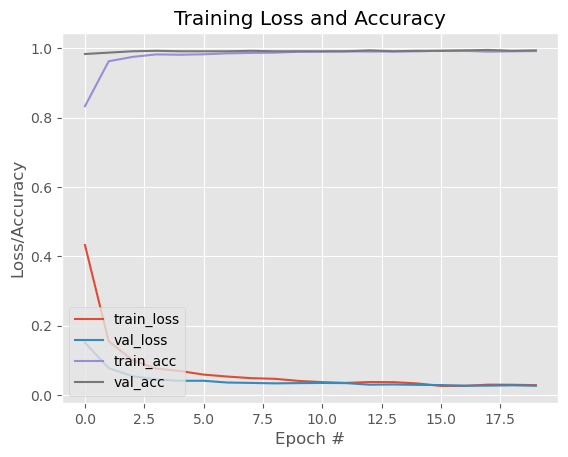

In [14]:
N = number_epochs
plt.style.use("ggplot")
plt.figure() 
plt.plot(np.arange(0,N),history.history["loss"],label = "train_loss")
plt.plot(np.arange(0,N),history.history["val_loss"],label ="val_loss")
plt.plot(np.arange(0,N),history.history["accuracy"],label ="train_acc")
plt.plot(np.arange(0,N),history.history["val_accuracy"], label ="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel('Epoch #')
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig("plot.png")